# To-do

[] Lectures and Applications

[] Proof-read

# Regression Analysis and Curve-Fitting


## Introduction

In this notebook we will learn how to apply a regression on simplified, synthetic data. 
The regression is used to learn/find a relationship between one (or multiple) independend variable(s) and one dependend variable. We focus here one single dependend variable. The result is a regression curve/model. Afterwards, this model can be used to predict new continuous numerical data. In the last part, we will talk about the basic concepts of 'models', as the (linear) regression is a relative simple model. [More to Regression.](https://en.wikipedia.org/wiki/Regression_analysis)




<div class ="alert alert-info">
    The term "regression" is used when predicting a numerical, continous variable, while "classification" is the term when predicting a discrete variable. Although the 'Logistic Regression' includes the term regression, it is acutally an algorithm for classification.
</div>

Possible applications are:
- Gutenberg-Richter-Law
- Wadati-Diagram

Is used/needed for the following lectures:
- Inversion 
- ....
 
## Table of Contents
- [Linear Regression](#Linear_Regression)
- [Polynomial Regression](#Polynomial_Regression)
- [What is a Model](#Model)
- [Split in Train and Test data](#Split)
- [Extrapolation](#Extrapolation)

- [Summary](#Summary)

<a id='Linear_Regression'></a> 
# Linear Regression

The linear regression investigates the 'linear' relationship between two variables, whereby one variable is assumed to be dependent on the other.

The simplest linear regression equation:

$y = x \cdot m + n$.

The goal is to learn/find the parameters $m$ and $n$ that link the input variable $x$ to the output variables $y$.

To find the optimal pair of $m$ and $n$ for your data, there are different 'techniques' that can be used. The most common one is to minimize an error function, e.g. absolute or least-square-fit, between the forward prediction of the model and the dependent variable of the data. The model with the lowest misfit is defined as best model. [More to linear regression.](https://machinelearningmastery.com/linear-regression-for-machine-learning/)

The standard procedure is the least-square:

Model: $y_i = x_i \cdot m + n$

True data: $ŷ_i $

$Error = \sum_{i=1}^{N} (ŷ_i - y_i)^2 $

Find out more about least-squares: [Wikipedia](https://en.wikipedia.org/wiki/Least_squares) or [Here](https://www.mathsisfun.com/data/least-squares-regression.html).

In general some assumtions need to be fulfilled: 
- no error in x, otherwise we need to use orthogonal regression
- y-error is gaussian distributed and homoscedastic

In [2]:
# Load packages
import numpy as num
import matplotlib.pyplot as plt

First, we create some synthetic data based on a functional relation between x and y, further we add noise.

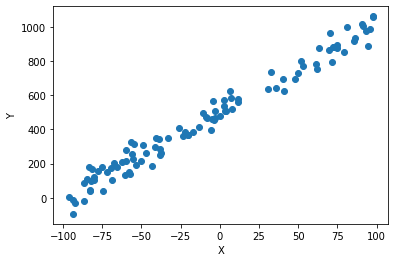

In [3]:
# Creating data
# xdata = num.linspace(-100, 100, 100)
xdata = num.random.uniform(-100, 100, 100)

# Setting random seed to create same noise
num.random.seed(0)

# Creating gaussian noise 
noise = num.random.normal(0, 50, len(xdata))

# offset variable
n = 500

# x-y-Function
ydata = 5 * xdata + n + noise

# Plotting data
plt.figure()
plt.scatter(xdata, ydata)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

For the regression, we will use [numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). The function needs our input (x) and output (y) data. The model is fitted and returns several parameters. First, the coefficients, here m and n of the regression function. The second value is the residual showing 'how good the fit is'  (the lower the better). The others are not of importance at the moment.

In [4]:
# Fitting
order = 1 # 1 for linear
coeff, residuals, _, _, _ = num.polyfit(xdata, ydata, order, full=True)
residuals = residuals[0]
print('Coeffs:', coeff)
print('Residual:', residuals)

Coeffs: [  5.12482592 504.15924815]
Residual: 248478.97440260422


We can use the coefficients now to create a regression curve. Either you manually calculate the predicted values (y) for a given set of input values (x) or you can also use helper-functions, here [numpy.poly1d](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html). The latter approach can be especailly helpful when the number of coeffiencts become large oder their relation is not so simple anymore.



Further, we can use those newly calculate 'residuals' values to calculate the so called *coefficient of determination*: R². This value determines how good the regression fits our (new) data in a normalized way, allowing for better interpretation and comparability. A value of 1 means perfect fit, while values of 0, or even lower, correspond to no relation between x and y.

Finally we can also have a look at the regression line directly. Visually speaking, a good model is obtained when the data points are close to the line.

R²: 0.974


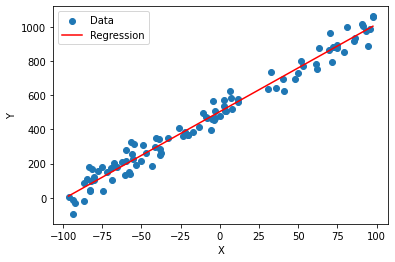

In [5]:
yregr = coeff[0] * xdata + coeff[1]

#model = num.poly1d(coeff)
#yregr = model(xdata)

# R2 score goodness-fit
# residuals = sum((ydata - yregr) ** 2)
denominator = sum((ydata - num.mean(ydata)) ** 2)
r2 = 1 - (residuals / denominator)
print('R²: %.3f' % r2)

# Plotting
plt.figure()
plt.scatter(xdata, ydata, label='Data')
# sorting the data, according to the xdata-values, to generate a 'clear' line
xdata, yregr = list(zip(*[(x,y) for x, y in sorted(zip(xdata, yregr))]))
plt.plot(xdata, yregr, color='red', label='Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

<div class ="alert alert-success">
Tasks
    
- create different linear functions
   
- play with different data densities and see how the linear regression behaves

</div>

<a id='Polynomial_Regression'></a> 
# Polynominal Regression

Often there is not a 'linear' relation between the two variables, but a polynominal, e.g. a squared or cubic.

The former expression is expanded to include higher order terms (here 3rd order):

$a * x^3 + b * x^2 + c * x + d + ... = y$

All the parameters a, b, c, d, ... will be trained.


First we look at an example where the linear regression visiually fails:

Coeffs: [  103.87044755 -1627.84774877]
Residual: 8764879.117130667
R²: 0.930


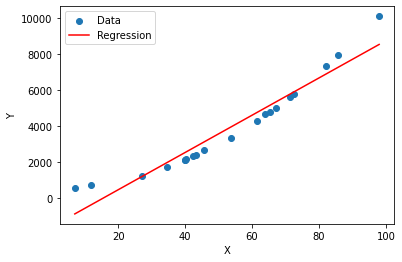

In [8]:
# Creating data
# xdata = num.linspace(0, 100, 20)
xdata = num.random.uniform(0, 100, 20)
num.random.seed(0)
noise = num.random.normal(0, 50, len(xdata))
# offset variable
n = 500
ydata = xdata**2 + n + noise
#ydata = xdata * 1 + n  + noise
#ydata = num.sin(xdata * 2 * num.pi * 0.01) + xdata * 0.01 + n


# Fitting
order = 1
coeff, residuals, rank, singular_values, rcond = num.polyfit(xdata, ydata, order, full=True)
print('Coeffs:', coeff)
print('Residual:', residuals[0])

model = num.poly1d(coeff)
yregr = model(xdata)

# R2 score goodness-fit
denominator = sum((ydata - num.mean(ydata)) ** 2)
r2 = 1 - (residuals[0] / denominator)
print('R²: %.3f' % r2)

# Plotting
plt.figure()
plt.scatter(xdata, ydata, label='Data')
# sorting the data, according to the xdata-values, to generate a 'clear' line
xdata, yregr = list(zip(*[(x,y) for x, y in sorted(zip(xdata, yregr))]))
plt.plot(xdata, yregr, color='red', label='Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Although the R²-value is high, the visual fit is not satisfying.

<div class ="alert alert-success">
Tasks
    
- change the order to 2
   
- play with different functions and orders
    
- overfitting
- underfitting

</div>

## Additional notes:

### Orthogonal Regression
Here we assumed that only the y-data has an uncertainty. If both x- and y-data have an uncertainty, one should use the orthogonal regression:

Normal Regression             |  Orthogonal Regression
:-------------------------:|:-------------------------:
<img src="pictures/linear_regression.jpeg" alt="https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817" width="500"/> | <img src="pictures/orthogonal_regression.png" alt="https://en.wikipedia.org/wiki/Total_least_squares" width="300"/>


### Multiple linear regression
It is also possible to include multiple input variables, $x_1, x_2, ...$:

$x_1 * a + x_2 * b + c = y$ 


<img src="pictures/multiple_regression.png" alt="https://www.inwt-statistics.de/blog-artikel-lesen/Multiple_lineare_Regression.html" width="300"/>

### Non-linear regression: 
Is not soo easy and needs a different approach for 'solving' it, this is a major part of the 'Inversion Module'. [See more](https://en.wikipedia.org/wiki/Nonlinear_regression)


<a id='Model'></a> 
# Model

The (multiple) linear regression is a special case of model(/machine) learning. The general goal is to create a model (whatever function) that can be used to either explain the data or to predict new data. Those models are usually based on maths or physics. 

One python toolbox that provides a lot of different, useful models (not only regression) is [scikit-learn](https://scikit-learn.org/stable/index.html). A great advantage is the consistent and easy-to-understand handling of the model.

An examplarly selection of models:
- Linear Regression
- Polynomial
- Logistic Regression
- Perceptron/Neural Networks
- Support-Vector-Machines
- Stochastic Gradient Descent
- Nearest Neighbor
- Decision Tree
- Clustering
- ...


To get to know this package, we start with a linear model. For that we need to load the regression model from sklearn. 

In [6]:
# Importing Linear Regression Model from scikit-learn
from sklearn.linear_model import LinearRegression

# Initializing the model/ Create python object
model = LinearRegression()

Before fitting the data we need to reshape our input data, as it is requested by the model. Afterwards, we give the model with .fit() our input (x) and output (y) data. The model is fitted and can be used to calculated some quality score and the regression parameters, similar as before. Here, the R²-score is already implemented as a function of our model.

Train-R² : 0.9682106810232779
Intercept: 502.91668565953614
Slope    : [4.98085475]


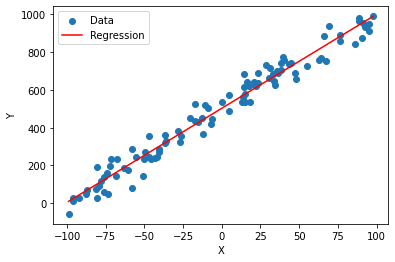

In [7]:
# Creating data
# xdata = num.linspace(-100, 100, 100)
xdata = num.random.uniform(-100, 100, 100)

# Setting random seed to create same noise
num.random.seed(0)

# Creating gaussian noise 
noise = num.random.normal(0, 50, len(xdata))

# offset variable
n = 500

# x-y-Function
ydata = 5 * xdata + n + noise

# Reshaping xdata to fit into model requirements 
xdata = xdata.reshape((-1, 1))

# Fitting the model to the data (or vice-versa?)
model.fit(xdata, ydata)

# Retrieving the quality score and coeffients
r_sq = model.score(xdata, ydata)
print('Train-R² :', r_sq)
print('Intercept:', model.intercept_)
print('Slope    :', model.coef_)

#yregr = model.coef_ * xdata + model.intercept_
yregr = model.predict(xdata)

plt.figure()
plt.scatter(xdata, ydata, label='Data')
# sorting the data, according to the xdata-values, to generate a 'clear' line
xdata, yregr = list(zip(*[(x,y) for x, y in sorted(zip(xdata, yregr))]))
plt.plot(xdata, yregr, color='red', label='Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#  gibts noch unsicherheiten die das model rausgibt?

The nice handling of sklearn models: all models can be fitted with the .fit() and prediction values can be created by using .predict(). Therefore, the model can be easily exchanged, without changing anything of the code.

Without going into to much detail, in sklearn there is no polynomial model directly, but there is the option to combine two functionalities to recreate it. First a polynomial feature selector followed by the known linear regression model, is put into a 'pipeline' or 'chain'. In end it behaves just as the numpy pendant. 

Train-R² : 0.9997053599893814


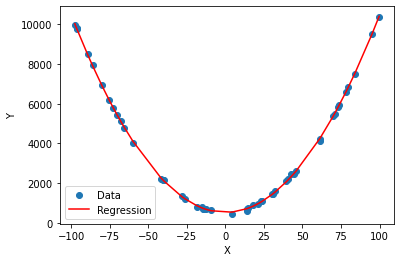

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Combining a the linear model with a polynomial features selector in sklearn
order = 2
model = Pipeline([('poly', PolynomialFeatures(degree=order)),
                  ('linear', LinearRegression(fit_intercept=False))])


# Creating data
# xdata = num.linspace(0, 100, 100)
xdata = num.random.uniform(-100, 100, 50)

# Setting random seed to create same noise
num.random.seed(0)

# Creating gaussian noise 
noise = num.random.normal(0, 50, len(xdata))

# offset variable
n = 500

# x-y-Function
ydata = xdata ** 2 + n + noise


# Reshaping
xdata = xdata.reshape((-1, 1))

# Fitting
model.fit(xdata, ydata)

# Predicting
yregr = model.predict(xdata)
r_sq = model.score(xdata, ydata)
print('Train-R² :', r_sq)

# Plotting
plt.figure()
plt.scatter(xdata, ydata, label='Data')
# sorting the data, according to the xdata-values, to generate a 'clear' line
xdata, yregr = list(zip(*[(x,y) for x, y in sorted(zip(xdata, yregr))]))
plt.plot(xdata, yregr, color='red', label='Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

<div class ="alert alert-success">
Tasks
    
- select a new regression model from sklearn, while trying different data

</div>

<a id='Split'></a> 
# Split in train and test datasets

Good practise in the machine learning community is to split the data into at least a training and a test set. The idea is that the model is learned with the help of the training data, while the test data is afterwards used to check how good the learned model performs on 'new', unseen data. If the score/fit of the test data is sufficient one speaks that the model generalized the problem sufficiently.

There are multiple ways of splitting the data:
- randomly select data points
- with a specific scheme: e.g. time based (e.g. last/first samples) 

First we test the random selection. There is help from sklearn for creating random subsets of our data.

Train-Intercept: 552.7880429767656
Train-Slope    : [5.00956213]
Train-R²       : 0.9810983990833193
Test-R²        : 0.9444038198801165


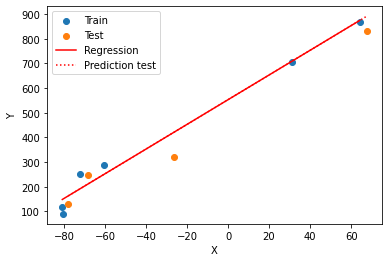

In [9]:
# Creating data
# xdata = num.linspace(-100, 100, 10)
xdata = num.random.uniform(-100, 100, 10)

num.random.seed(0)
noise = num.random.normal(0, 50, len(xdata))

# offset variable
n = 500

# x-y-Function
ydata = xdata * 5 + n + noise

# Split data randomly into xx% train and xx% test set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.33, random_state=42)

# Reshaping
xtrain = xtrain.reshape((-1, 1))
xtest = xtest.reshape((-1, 1))

from sklearn.linear_model import LinearRegression

# Fitting
model = LinearRegression()
model.fit(xtrain, ytrain)
print('Train-Intercept:', model.intercept_)
print('Train-Slope    :', model.coef_)

# Predicting train data
yregr = model.predict(xtrain)
train_rsq = model.score(xtrain, ytrain)
print('Train-R²       :', train_rsq)

# Predicting test data
ypred = model.predict(xtest)
test_rsq = model.score(xtest, ytest)
print('Test-R²        :', test_rsq)

plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xtest, ytest, label='Test')
# sorting the data, according to the xdata-values, to generate a 'clear' line
xtrain, yregr = list(zip(*[(x,y) for x, y in sorted(zip(xtrain, yregr))]))
plt.plot(xtrain, yregr, color='red', label='Regression')

# sorting the data, according to the xdata-values, to generate a 'clear' line
xtest, ypred = list(zip(*[(x,y) for x, y in sorted(zip(xtest, ypred))]))
plt.plot(xtest, ypred, color='red', linestyle=':', label='Prediction test')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Now, we can calculate the R²-score for the train set, but more importantly is the value for the test set. Usually, the train score is higher than the test score, but for good model both values are high.

<div class ="alert alert-success">
Tasks
    
- play around with the data density
    
- change the train-test split sizes
</div>

<a id='Extrapolation'></a> 
# Extrapolation
In general, a model is used for predicting values within its training range (within the range of the input data). Therefore, the trained model can be used for interpolation, meaning predicting y-values for x-values that were not part of the initial training set, e.g. between two x-points. There are a lot of interpolation techniques that can be used when no functional form can be determined/is known, e.g. mean of neighbors, cubic splines etc.. 

On the other hand, extrapolation is the term when predicting values that are outside of the training range. Usually, this is not a good idea as the model wasn't trained for this range. But there are cases where extrapolation is the main goal of the model. For example, predicting future data in weather forecast.

We can simulate this by selecting the last part of our data as test data for a simple linear regression.

Train-Intercept: 494.36715369635044
Train-Slope    : [4.19185391]
Train-R²       : 0.9022069337627144
Test-R²        : 0.708612124144207


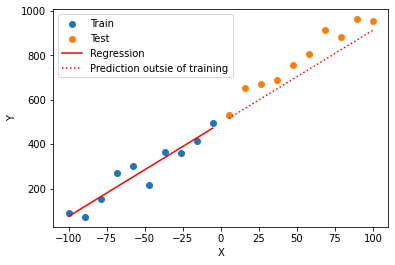

In [10]:
# Creating data
xdata = num.linspace(-100, 100, 20)
num.random.seed(0)
noise = num.random.normal(0, 50, len(xdata))

# offset variable
n = 500
# x-y-Function
ydata = xdata * 5 + n + noise


## Splitting by indices
## Selecting the first data as training and the last as testing
index = int(len(xdata)/2)
xtrain = xdata[:index]
ytrain = ydata[:index]

xtest = xdata[index:]
ytest = ydata[index:]

xtrain = xtrain.reshape((-1, 1))
xtest = xtest.reshape((-1, 1))


# Fitting and plotting
model = LinearRegression()
model.fit(xtrain, ytrain)

# Predicting
yregr = model.predict(xtrain)
ypred = model.predict(xtest)
train_rsq = model.score(xtrain, ytrain)
test_rsq = model.score(xtest, ytest)
print('Train-Intercept:', model.intercept_)
print('Train-Slope    :', model.coef_)
print('Train-R²       :', train_rsq)
print('Test-R²        :', test_rsq)

# Plotting
plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xtest, ytest, label='Test')
# sorting the data, according to the xdata-values, to generate a 'clear' line
xtrain, yregr = list(zip(*[(x,y) for x, y in sorted(zip(xtrain, yregr))]))
plt.plot(xtrain, yregr, color='red', label='Regression')

# sorting the data, according to the xdata-values, to generate a 'clear' line
xtest, ypred = list(zip(*[(x,y) for x, y in sorted(zip(xtest, ypred))]))
plt.plot(xtest, ypred, color='red', linestyle=':', label='Prediction outsie of training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

As we see now, the learned regression does not fit the test so well.  

<div class ="alert alert-success">
Tasks
    
- play around with the data density
    
- change the train-test split sizes
    
- change the functional form to e.g. quadratic
</div>

<a id='Summary'></a> 
# Summary

We have learned
- the basic ideas behind regression for linear data and polynominal data
- leared models can be used for prediction of new data within the training range (interpolation) or simply representing it
- it is better to split the data before training in at least a training and a testing set
- extrapolation should be avoid, unless the goal of our model is to predict future or extrem data